In [2]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
# Import CSV and make dataframe
df = pd.read_csv('../data/01-raw/flights.csv',  low_memory=False)
df['Date'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df.dropna(subset= ['DEPARTURE_DELAY', 'ARRIVAL_DELAY'], inplace = True)
df['Scheduled Hour'] = (df['SCHEDULED_TIME'] // 100).astype(int)
df['Scheduled Arrival Time'] = (df['SCHEDULED_ARRIVAL'] // 100).astype(int)
df['Delayed or not'] = np.where(
    (df['DEPARTURE_DELAY'] < 15) & (df['ARRIVAL_DELAY'] < 15),
    'Not delayed',
    'Delayed'
)
df['Is_Delayed'] = (df['Delayed or not'] == 'Delayed').astype(int)

print(df)

         YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0        2015      1    1            4      AS             98      N407AS   
1        2015      1    1            4      AA           2336      N3KUAA   
2        2015      1    1            4      US            840      N171US   
3        2015      1    1            4      AA            258      N3HYAA   
4        2015      1    1            4      AS            135      N527AS   
...       ...    ...  ...          ...     ...            ...         ...   
5819074  2015     12   31            4      B6            688      N657JB   
5819075  2015     12   31            4      B6            745      N828JB   
5819076  2015     12   31            4      B6           1503      N913JB   
5819077  2015     12   31            4      B6            333      N527JB   
5819078  2015     12   31            4      B6            839      N534JB   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
0  

In [4]:
# Setup the things for the random forest classifier
X = df[['MONTH', 'DAY_OF_WEEK', 'DISTANCE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'AIRLINE', 'Scheduled Hour', 'Scheduled Arrival Time']]
Y = df['Is_Delayed']

# Encode categorical variables
X_encoded = pd.get_dummies(X, columns=['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'AIRLINE'])
X_encoded.head()

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

In [ ]:
# Ran in Google Collab for speed
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_oe = rf_classifier.predict(X_test)

KeyboardInterrupt: 

In [ ]:
# Save it
import joblib
joblib.dump(rf_classifier, "../model/2015_Airport_Random_Forest_Classifier.joblib")

In [ ]:
import joblib
# I did this in Google Colab as my PC was taking too long
model = joblib.load('../model/random_forest_model.joblib')

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Accuracy:  0.6161583546406114


Text(50.722222222222214, 0.5, 'Actual Values ')

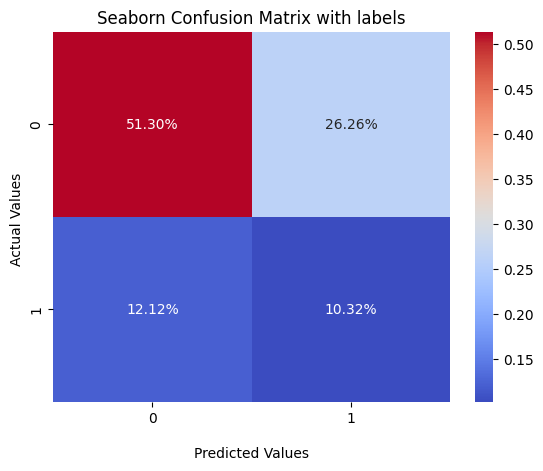

In [ ]:
# Import libraries
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Reindexing and grabbing columns to match it with what Google Collab had since I moved from there to local after downloading the file
X = df[['MONTH', 'DAY_OF_WEEK', 'DISTANCE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'AIRLINE', 'Scheduled Hour', 'Scheduled Arrival Time']]
Y = df['Is_Delayed']

X_encoded = pd.get_dummies(X, columns=['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'AIRLINE'])
X_encoded.head()

X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

model_columns = model.feature_names_in_  
X_test_aligned = X_test.reindex(columns=model_columns, fill_value=0)

# Get the accuarcy
y_pred_oe = model.predict(X_test_aligned)
accuracy_oe = accuracy_score(y_test, y_pred_oe)
print("Accuracy: ", accuracy_oe)

# Get the confusion matrix and show by percentages
conf_mat = confusion_matrix(y_test, y_pred_oe)
ax = sns.heatmap(conf_mat / np.sum(conf_mat), annot = True, fmt='.2%', cmap = 'coolwarm')
ax.set_title('Seaborn Confusion Matrix with labels')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')